Fourier Stuff
-------------

Jim Mahoney | Jan 2018

In [45]:
# python 2
import numpy as np
from numpy import pi, exp, linspace, zeros, array, conjugate, sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
N = 4                  # number of points
x = array(range(N))    # x axis index : 0 .. N-1

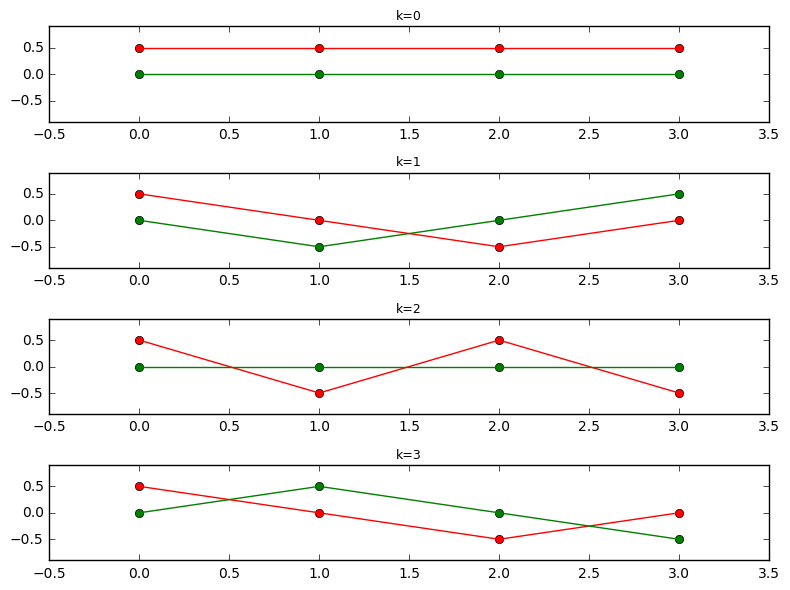

In [48]:
# The complex exponential basis 

def k_basis(k):
    """ Return one of the complex exp basis functions"""
    return exp(-1j * x * k * 2*pi/N ) / sqrt(N)

def subplot_basis(k):
    """ Plot one of the basis functions """
    plt.subplot(410 + k + 1)
    plt.axis([-0.5, N-0.5, -0.9, 0.9])
    plt.title("k={}".format(k), fontsize=9)
    plt.plot(x, k_basis(k).real, 'ro', x, k_basis(k).real, 'r')
    plt.plot(x, k_basis(k).imag, 'go', x, k_basis(k).imag, 'g')

def plot_basis():
    plt.figure(dpi=200, figsize=(8, 6)) # (x inches, y inches)
    for k in range(N):
        subplot_basis(k)
    plt.tight_layout()
    plt.show()

plot_basis()

In [51]:
# Show that the basis vectors are orthonal.

def dot(x, y):
    """ Inner product including complex conjugation, normalized by 1/N , rounded"""
    result = np.dot(x, np.conjugate(y))
    return np.round(result, 10)

def k_basis_dots():
    """ Return matrix of dot products of k basis"""
    dot_products = zeros([N,N], dtype=np.complex_)
    for k1 in range(N):
        for k2 in range(N):
            dot_products[k1, k2] = dot(k_basis(k1), k_basis(k2))
    return dot_products

print k_basis_dots()

[[ 1.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j  1.+0.j -0.+0.j  0.+0.j]
 [ 0.-0.j -0.-0.j  1.+0.j -0.+0.j]
 [ 0.-0.j  0.-0.j -0.-0.j  1.+0.j]]


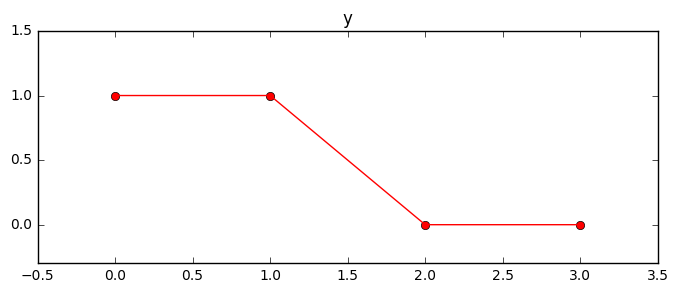

In [56]:
# Define some function that we want to take the Fourier transform of.

y = array([1, 1, 0, 0])

plt.figure(dpi=200, figsize=(8, 3)) # (x inches, y inches)
plt.axis([-0.5, N-0.5, -0.3, 1.5])
plt.title("y")
plt.plot(x, y, 'ro', x, y, 'r')
plt.show()


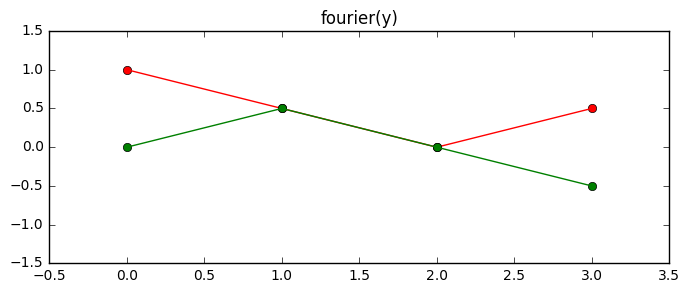

In [59]:

def fourier(y):
    """ Return (complex) coefficients of fourier transform"""
    return array([dot(y, k_basis(k)) for k in range(N)])

C = fourier(y)
C_power = sqrt(C * conjugate(C))

plt.figure(dpi=200, figsize=(8, 3)) # (x inches, y inches)
plt.axis([-0.5, N-0.5, -1.5, 1.5])
plt.title("fourier(y)")
plt.plot(x, C.real, 'ro', x, C.real, 'r')
plt.plot(x, C.imag, 'go', x, C.imag, 'g')
#plt.plot(x, C_power, 'bo', x, C_power, 'b')
plt.show()


In [ ]:
# check to see that it worked 

